In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [55]:
df = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

In [57]:
traindf=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
traindf['Title2']=traindf['Name'].str.extract(r'(,\s.*?\.\s{1})')
traindf['Title2']=traindf['Title2'].apply(lambda x : x[2:-2])
traindf['Title2'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title2, dtype: int64

# feature selection

In [59]:
traindf['Cabin']=traindf['Cabin'].fillna('N0')
traindf['CabinT']=traindf['Cabin'].astype(str).str[0]
traindf=traindf.drop('Cabin',axis=1)
traindf['Pclass']=traindf['Pclass'].astype(object)
traindf['SibSp']=traindf['SibSp'].astype(object)
traindf['Parch']=traindf['Parch'].astype(object)
# traindf['Royal']=traindf['Name'].str.contains("Miss|Master").astype('object')
# traindf['Title'] = traindf['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
# stat_min = 10
# title_names = (traindf['Title'].value_counts() < stat_min)
# traindf['Title'] = traindf['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
traindf['Title2']=traindf['Name'].str.extract(r'(,\s.*?\.\s{1})')
traindf['Title2']=traindf['Title2'].apply(lambda x : x[2:-2])
traindf['Title2']=traindf['Title2'].map(newtitles)

# traindf['RoyalCheck']=traindf['Name'].str.contains("\(").astype('object')
traindf[['TicketCheck', 'TicketCheck2']] = traindf['Ticket'].str.split('/', expand=True)
traindf['TicketCheck'] = traindf['TicketCheck'].str.replace('\d+', '')
traindf['TicketCheck'] = traindf['TicketCheck'].str.replace('.', '')
traindf['TicketCheck'] = traindf['TicketCheck'].str.replace('', '')
traindf['TicketCheck'] = traindf['TicketCheck'].fillna("N")
traindf['TicketCheck2'] = traindf['TicketCheck2'].str.replace('\d+', '')
traindf['TicketCheck2'] = traindf['TicketCheck2'].str.replace('.', '')
traindf['TicketCheck2'] = traindf['TicketCheck2'].str.replace(' ', '')
traindf['TicketCheck2'] = traindf['TicketCheck2'].fillna("N")
traindf['Embarked'] = traindf['Embarked'].fillna("N")

traindf

<ipython-input-59-9a310b8b6fee>:18: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-59-9a310b8b6fee>:19: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-59-9a310b8b6fee>:22: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-59-9a310b8b6fee>:23: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,N,A,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C,PC,N
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,N,STON,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C,,N
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,N,,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Officer,N,,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,B,,N
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss,N,W,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,C,,N


In [60]:
for i in traindf.columns:
  print(i,traindf[i].isnull().sum(),traindf[i].dtype)

PassengerId 0 int64
Survived 0 int64
Pclass 0 object
Name 0 object
Sex 0 object
Age 177 float64
SibSp 0 object
Parch 0 object
Ticket 0 object
Fare 0 float64
Embarked 0 object
Title2 0 object
CabinT 0 object
TicketCheck 0 object
TicketCheck2 0 object


In [61]:
traindf=traindf.drop('Name',axis=1)
traindf['Age']=traindf['Age'].interpolate()
#traindf['Age']=traindf['Age'].ffill()
#traindf=traindf.drop('Age',axis=1)
traindf=traindf.drop('Ticket',axis=1)
traindf=traindf.drop('PassengerId',axis=1)
traindf=traindf.dropna()
traindf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,0,3,male,22.0,1,0,7.2500,S,Mr,N,A,
1,1,1,female,38.0,1,0,71.2833,C,Mrs,C,PC,N
2,1,3,female,26.0,0,0,7.9250,S,Miss,N,STON,O
3,1,1,female,35.0,1,0,53.1000,S,Mrs,C,,N
4,0,3,male,35.0,0,0,8.0500,S,Mr,N,,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Officer,N,,N
887,1,1,female,19.0,0,0,30.0000,S,Miss,B,,N
888,0,3,female,22.5,1,2,23.4500,S,Miss,N,W,C
889,1,1,male,26.0,0,0,30.0000,C,Mr,C,,N


In [62]:
for i in traindf.columns:
  print(i,traindf[i].isnull().sum(),traindf[i].dtype)

Survived 0 int64
Pclass 0 object
Sex 0 object
Age 0 float64
SibSp 0 object
Parch 0 object
Fare 0 float64
Embarked 0 object
Title2 0 object
CabinT 0 object
TicketCheck 0 object
TicketCheck2 0 object


In [63]:
y=traindf[['Survived']]

In [64]:
x=traindf.drop('Survived',axis=1)
xdt=x

In [65]:
import plotly.express as px
for i in traindf.columns:
  fig = px.histogram(traindf, x=i , color="Title2")
  fig.show()

In [66]:
import plotly.express as px
for i in traindf.columns:
  fig = px.histogram(traindf, x=i , color="Survived")
  fig.show()

# Test

In [67]:
testdf=pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [68]:
testdf['Title2']=testdf['Name'].str.extract(r'(,\s.*?\.\s{1})')
testdf['Title2']=testdf['Title2'].apply(lambda x : x[2:-2])
testdf['Title2'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title2, dtype: int64

In [69]:
testdf['Cabin']=testdf['Cabin'].fillna('N0')
testdf['CabinT']=testdf['Cabin'].astype(str).str[0]
testdf=testdf.drop('Cabin',axis=1)
testdf['Pclass']=testdf['Pclass'].astype(object)
testdf['SibSp']=testdf['SibSp'].astype(object)
testdf['Parch']=testdf['Parch'].astype(object)
# testdf['Royal']=testdf['Name'].str.contains("Miss|Master").astype('object')
# testdf['Title'] = testdf['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
# stat_min = 10
# title_names = (testdf['Title'].value_counts() < stat_min)
# testdf['Title'] = testdf['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
testdf['Title2']=testdf['Name'].str.extract(r'(,\s.*?\.\s{1})')
testdf['Title2']=testdf['Title2'].apply(lambda x : x[2:-2])
testdf['Title2']=testdf['Title2'].map(newtitles)
# testdf['RoyalCheck']=testdf['Name'].str.contains("\(").astype('object')
testdf[['TicketCheck', 'TicketCheck2']] = testdf['Ticket'].str.split('/', expand=True)
testdf['TicketCheck'] = testdf['TicketCheck'].str.replace('\d+', '')
testdf['TicketCheck'] = testdf['TicketCheck'].str.replace('.', '')
testdf['TicketCheck'] = testdf['TicketCheck'].str.replace('', '')
testdf['TicketCheck'] = testdf['TicketCheck'].fillna("None")
testdf['TicketCheck2'] = testdf['TicketCheck2'].str.replace('\d+', '')
testdf['TicketCheck2'] = testdf['TicketCheck2'].str.replace('.', '')
testdf['TicketCheck2'] = testdf['TicketCheck2'].str.replace(' ', '')
testdf['TicketCheck2'] = testdf['TicketCheck2'].fillna("None")
testdf['Embarked'] = testdf['Embarked'].fillna("N")
testdf=testdf.drop('Name',axis=1)
testdf['Age']=testdf['Age'].interpolate()
#testdf=testdf.drop('Age',axis=1)
testdf=testdf.drop('Ticket',axis=1)
testdf=testdf.drop('PassengerId',axis=1)

<ipython-input-69-ec62aac1aba1>:17: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-69-ec62aac1aba1>:18: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-69-ec62aac1aba1>:21: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-69-ec62aac1aba1>:22: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [70]:
for i in testdf.columns:
  print(i,testdf[i].isnull().sum(),testdf[i].dtype)

Pclass 0 object
Sex 0 object
Age 0 float64
SibSp 0 object
Parch 0 object
Fare 1 float64
Embarked 0 object
Title2 0 object
CabinT 0 object
TicketCheck 0 object
TicketCheck2 0 object


In [71]:
testdf=testdf.fillna(0)
xtest=testdf

In [72]:
traindf.describe()

,Survived,Age,Fare
count,891.000000,891.000000,891.000000
mean,0.383838,29.726061,32.204208
std,0.486592,13.902353,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,21.000000,7.910400
50%,0.000000,28.500000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


fix class imbalances

In [73]:
# over = RandomOverSampler()
# x,y = over.fit_resample(x,y)
# x

In [74]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Nommalize numeric data encode categorical *data*

In [75]:
def encodescale(tempdf):
  ob = tempdf.columns.to_list()
  temp=""
  for i in ob:
      temp = tempdf[i]
      if(tempdf[i].dtype=='object'):
        # encode class values as integers
        encoder = LabelEncoder()
        encoder.fit(temp)
        encoded_temp = encoder.transform(temp)
        tempdf[i]=encoded_temp
      else:
        scaler = StandardScaler()
        tempdf[i]=scaler.fit_transform(temp.values.reshape(-1,1))
  return tempdf



In [76]:
y=traindf['Survived']
x=traindf.drop('Survived',axis=1)

In [77]:
xcom=pd.concat([x,xtest])
xcom=encodescale(xcom)
xcom

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,2,1,-0.568631,1,0,-0.503023,3,2,7,1,0
1,0,0,0.593621,1,0,0.734878,0,3,2,14,5
2,2,0,-0.278068,0,0,-0.489974,3,1,7,24,7
3,0,0,0.375699,1,0,0.383356,3,3,2,0,5
4,2,1,0.375699,0,0,-0.487558,3,2,7,0,5
...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,0.266738,0,0,-0.487558,3,2,7,2,6
414,0,0,0.666262,0,0,1.462090,0,5,2,14,6
415,2,1,0.629941,0,0,-0.503023,3,2,7,22,8
416,2,1,0.629941,0,0,-0.487558,3,2,7,0,6


# test train validation split

In [78]:
x = xcom.iloc[:len(x)]
xtest = xcom.iloc[len(x):]

In [79]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,2,1,0.339378,0,0,-0.491826,2,2,7,0,6
1,2,0,1.247388,1,0,-0.507857,3,3,7,0,6
2,1,1,2.336998,0,0,-0.455901,2,2,7,0,6
3,2,1,-0.205427,0,0,-0.475717,3,2,7,0,6
4,2,0,-0.568631,1,1,-0.405638,3,3,7,0,6
...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,0.266738,0,0,-0.487558,3,2,7,2,6
414,0,0,0.666262,0,0,1.462090,0,5,2,14,6
415,2,1,0.629941,0,0,-0.503023,3,2,7,22,8
416,2,1,0.629941,0,0,-0.487558,3,2,7,0,6


In [80]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,2,1,-0.568631,1,0,-0.503023,3,2,7,1,0
1,0,0,0.593621,1,0,0.734878,0,3,2,14,5
2,2,0,-0.278068,0,0,-0.489974,3,1,7,24,7
3,0,0,0.375699,1,0,0.383356,3,3,2,0,5
4,2,1,0.375699,0,0,-0.487558,3,2,7,0,5
...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,-0.205427,0,0,-0.391864,3,4,7,0,5
887,0,0,-0.786553,0,0,-0.063217,3,1,1,0,5
888,2,0,-0.532310,1,2,-0.189843,3,1,7,26,4
889,0,1,-0.278068,0,0,-0.063217,0,2,2,0,5


In [81]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [82]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,2,1,0.339378,0,0,-0.491826,2,2,7,0,6
1,2,0,1.247388,1,0,-0.507857,3,3,7,0,6
2,1,1,2.336998,0,0,-0.455901,2,2,7,0,6
3,2,1,-0.205427,0,0,-0.475717,3,2,7,0,6
4,2,0,-0.568631,1,1,-0.405638,3,3,7,0,6
...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,0.266738,0,0,-0.487558,3,2,7,2,6
414,0,0,0.666262,0,0,1.462090,0,5,2,14,6
415,2,1,0.629941,0,0,-0.503023,3,2,7,22,8
416,2,1,0.629941,0,0,-0.487558,3,2,7,0,6


# normalize encoded data

In [83]:
x = xcom.iloc[:len(x)]
xtest = xcom.iloc[len(x):]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title2,CabinT,TicketCheck,TicketCheck2
0,2,1,-0.568631,1,0,-0.503023,3,2,7,1,0
1,0,0,0.593621,1,0,0.734878,0,3,2,14,5
2,2,0,-0.278068,0,0,-0.489974,3,1,7,24,7
3,0,0,0.375699,1,0,0.383356,3,3,2,0,5
4,2,1,0.375699,0,0,-0.487558,3,2,7,0,5
...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,-0.205427,0,0,-0.391864,3,4,7,0,5
887,0,0,-0.786553,0,0,-0.063217,3,1,1,0,5
888,2,0,-0.532310,1,2,-0.189843,3,1,7,26,4
889,0,1,-0.278068,0,0,-0.063217,0,2,2,0,5


# test validation split

In [84]:
from sklearn.model_selection import train_test_split
X_traint, X_valid, y_traint, y_valid = train_test_split(x, y, test_size=0.30, random_state=42)

# Random forest


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_forest = RandomForestClassifier(n_estimators=1000)
model = random_forest.fit(X_traint, y_traint)
accuracy = round(random_forest.score(x, y) * 100, 2)
accuracy

94.16

In [86]:
predictions = model.predict(X_valid)
accuracy_score(y_valid, predictions)

0.8097014925373134

In [87]:
print(predictions)

[1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [88]:
output=pd.DataFrame()
output['Survived'] = predictions
output['PassengerId'] = range(892, 892+len(output))
output[['PassengerId','Survived']].to_csv("/content/drive/MyDrive/titanic/outputrf.csv",index=False)

# random forest polynomial


In [89]:
poly = PolynomialFeatures(degree = 4)
pipe = Pipeline([('polynomial_features',poly), ('lrandom_forest',random_forest)])
pipe.fit(X_traint, y_traint)
pipe.score(X_valid, y_valid)
#pipe.score(x_test, y_test)

0.8022388059701493

# Decision Forest

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
modelft = dt.fit(X_traint, y_traint)
accuracy = round(dt.score(x, y) * 100, 2)
accuracy

83.5

In [91]:
predictions = modelft.predict(X_valid)
accuracy_score(y_valid, predictions)

0.7611940298507462

In [92]:
print(predictions)

[0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]


In [93]:
output=pd.DataFrame()
output['Survived'] = predictions
output['PassengerId'] = range(892, 892+len(output))
output[['PassengerId','Survived']].to_csv("/content/drive/MyDrive/titanic/outputdt.csv",index=False)

# decision tree polynomial

In [94]:
poly = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
pipe = Pipeline([('polynomial_features',poly), ('decision_tree',dt)])
pipe.fit(X_traint, y_traint)
pipe.score(X_valid, y_valid)
#pipe.score(X_test, y_test)

0.7798507462686567

# cat classifier

In [95]:
!pip install catboost

In [96]:
from catboost import CatBoostClassifier, Pool
# Initialize data
cat_features = [0, 1]

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=16, cat_features=cat_features)
# Fit model
model.fit(x,y)
# Get predicted classes
preds_class = model.predict(xtest)
model.score(Pool(X_valid,y_valid, cat_features))
# Get predicted probabilities for each class
#preds_proba = model.predict_proba(X_valid,y_valid)
# Get predicted RawFormulaVal
#preds_raw = model.predict(X_valid,y_valid, prediction_type='RawFormulaVal')

0:	learn: 0.6528794	total: 1.55ms	remaining: 154ms
1:	learn: 0.6241098	total: 2.64ms	remaining: 130ms
2:	learn: 0.6028957	total: 3.34ms	remaining: 108ms
3:	learn: 0.5779115	total: 4.33ms	remaining: 104ms
4:	learn: 0.5602792	total: 4.33ms	remaining: 104ms
5:	learn: 0.5455012	total: 5.58ms	remaining: 105ms
6:	learn: 0.5314539	total: 12.9ms	remaining: 201ms
7:	learn: 0.5212992	total: 15ms	remaining: 197ms
8:	learn: 0.5101162	total: 15ms	remaining: 197ms
9:	learn: 0.4988552	total: 172ms	remaining: 1.93s
10:	learn: 0.4883921	total: 195ms	remaining: 1.93s
11:	learn: 0.4804262	total: 1.18s	remaining: 10.4s
12:	learn: 0.4734269	total: 2.09s	remaining: 16.5s
13:	learn: 0.4669836	total: 3.77s	remaining: 27s
14:	learn: 0.4590986	total: 3.78s	remaining: 24.7s
15:	learn: 0.4540454	total: 5.77s	remaining: 34.6s
16:	learn: 0.4491321	total: 8.2s	remaining: 45.4s
17:	learn: 0.4452348	total: 8.2s	remaining: 42s
18:	learn: 0.4397130	total: 8.38s	remaining: 39.9s
19:	learn: 0.4338455	total: 8.41s	remainin

0.8992537313432836

In [97]:
preds_class

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [98]:
output=pd.DataFrame()
output['Survived'] = preds_class
output['PassengerId'] = range(892, 892+len(output))
output[['PassengerId','Survived']].to_csv("/content/drive/MyDrive/titanic/outputcbc.csv",index=False)

# construct model

In [99]:
import tensorflow as tf
import keras


In [110]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(11,activation='relu'),
        #tf.keras.layers.Dropout(rate=0.5),
        #tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        #tf.keras.layers.Dropout(rate=0.5),
        #tf.keras.layers.Attention(use_scale=False, score_mode="dot", dropout=0.0, seed=None),
        #tf.keras.layers.Dense(32,activation='selu'),

        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(128,activation='selu'),
        tf.keras.layers.Dense(128,activation='selu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        #tf.keras.layers.GlobalMaxPooling2D(pool_size=2, strides=2, padding="valid"),
        tf.keras.layers.Dense(32,activation='relu'),
        #tf.keras.layers.Dense(32,activation='selu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [111]:
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00005),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# model evaluation with trianing

In [113]:
model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.3827


[0.7113003134727478, 0.3827160596847534]

# model training

In [114]:
hist = model.fit(x,y,batch_size=10,epochs=400)

Epoch 1/400
90/90 [==============================] - 3s 7ms/step - loss: 0.6673 - accuracy: 0.5903
Epoch 2/400
90/90 [==============================] - 1s 6ms/step - loss: 0.6338 - accuracy: 0.6689
Epoch 3/400
90/90 [==============================] - 1s 6ms/step - loss: 0.6161 - accuracy: 0.6936
Epoch 4/400
90/90 [==============================] - 1s 6ms/step - loss: 0.6015 - accuracy: 0.6958
Epoch 5/400
90/90 [==============================] - 1s 6ms/step - loss: 0.5893 - accuracy: 0.7048
Epoch 6/400
90/90 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.7071
Epoch 7/400
90/90 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7138
Epoch 8/400
90/90 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7205
Epoch 9/400
90/90 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.7351
Epoch 10/400
90/90 [==============================] - 0s 4ms/step - loss: 0.5685 - accuracy: 0.7205
Epoch 11/

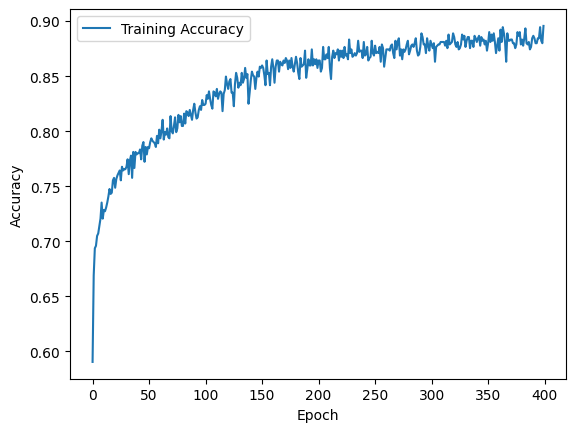

In [115]:
plt.plot(hist.history['accuracy'],label='Training Accuracy')
#plt.plot(hist.history['loss'],label='loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# model testing

In [116]:
predict_x = model.predict(xtest)
classes_x=np.around(predict_x)

14/14 [==============================] - 0s 2ms/step


In [117]:
final=[]
for j in classes_x:
  final.append(j[0].astype(int))

In [118]:
accuracy_score(y_valid, final)

ValueError: Found input variables with inconsistent numbers of samples: [268, 418]

In [119]:
len(classes_x)

418

In [120]:
output=pd.DataFrame()
output['Survived'] = final
output['PassengerId'] = range(892, 892+len(output))
output[['PassengerId','Survived']].to_csv("/content/drive/MyDrive/titanic/outputnn.csv",index=False)